In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Continuous Spectrum

In [2]:
# import ContSpect interactively; this does not run anything!
from contSpec import *

In [3]:
# This runs the code in regular form using inp.dat
par = readInput('inp.dat')

#par['verbose'] = False

par['GexpFile'] = 'tests/test4.dat'
par['plateau'] = False

par['plotting'] = False

s, Hc, G0, lamC = getContSpec(par)
plt.clf()


(*) Start
(*) Loading Data File: tests/test4.dat...
(*) Initial Set up...	(3.3 seconds)
(*) Building the L-curve ...(4.0 seconds)
(*) Extracting CRS, ...
	... lamM = 4.649e+00; done (0.2 seconds)
(*) Writing and Printing, ...done
(*) End



<Figure size 432x288 with 0 Axes>

In [4]:
G0

0.0

In [5]:
s, w, kernMat, Gexp, wexp, par, lam, rho, eta = guiFurnishGlobals(par);

(*) Initial Set up...

Currently all the variables assigned in the jupyter notebook are visible as global to to guiUpdatePlot.

In [6]:
def guiUpdatePlot(SmoothFac=0):

    lam_min  = 1e-10
    lam_max  = 1e+1
    
    # Dialling in the Smoothness Factor
    if SmoothFac > 0:
        lamda = np.exp(np.log(lamC) + SmoothFac*(np.log(lam_max) - np.log(lamC)));
    elif SmoothFac < 0:
        lamda = np.exp(np.log(lamC) + SmoothFac*(np.log(lamC) - np.log(lam_min)));
    else:
        lamda = lamC
        
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=3)

    # plotsInteractivity
    if par['plateau']:
        H, G0 = getH(3.34, Gexp, wexp, Hc, kernMat, par['plateau'])
        K = kernel_prestore(H, kernMat, G0)
    else:
        H = getH(3.34, Gexp, wexp, Hc, kernMat)
        K = kernel_prestore(H, kernMat)
        
    rhost = np.exp(np.interp(np.log(lamC), np.log(lam), np.log(rho)))
    etast = np.exp(np.interp(np.log(lamC), np.log(lam), np.log(eta)))

    rhox = np.exp(np.interp(np.log(lamda), np.log(lam), np.log(rho)))
    etax = np.exp(np.interp(np.log(lamda), np.log(lam), np.log(eta)))
    
    n = len(w)
    
    ax[0].loglog(w, Gexp[:n],'g.')
    ax[0].loglog(w, Gexp[n:],'g.')

    ax[0].loglog(w, K[:n], 'k-')
    ax[0].loglog(w, K[n:], 'k-')

    ax[0].set_xlabel(r'$\omega$')
    ax[0].set_ylabel(r'$G^{*}$')
    
    ax[1].semilogx(s,H,'o-')
    ax[1].set_xlabel(r'$s$')
    ax[1].set_ylabel(r'$H(s)$')

    ax[2].plot(rho, eta, 'x-')
    ax[2].scatter(rhost, etast, color='k')
    ax[2].scatter(rhox, etax, color='g')

    ax[2].set_xscale('log')
    ax[2].set_yscale('log')    

    ax[2].set_xlabel(r'$\rho$')
    ax[2].set_ylabel(r'$\eta$')
    
    # figure settings
    fig.tight_layout()
    
    plt.show()

### Interactivity

In [7]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

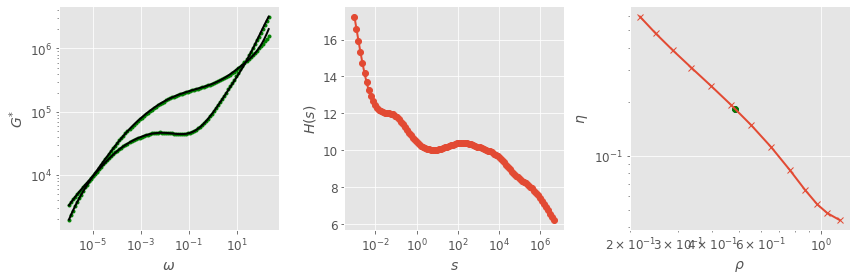

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='SmoothFac', max=1.0, min=-1…

In [9]:
interact(guiUpdatePlot, SmoothFac=widgets.FloatSlider(min=-1, max=1, value=0, step=0.05, continuous_update=False));